In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
import pandas as pd

%matplotlib inline 

In [17]:
path = '..\output\data\sat50_temporal_MDRW_sampled12_rep30.csv' 
df = pd.read_csv(path, sep=',', index_col='Unnamed: 0')
df

,Timestamp,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
0,0,0.96,2.916667,0.275919,0.060176,1,308,0.727833
1,12,0.96,2.989583,0.297316,0.058354,2,308,0.724500
2,24,0.84,2.714286,0.319282,0.048392,1,250,0.655833
3,36,0.84,4.976190,0.354895,0.042554,1,260,0.634167
4,48,0.84,5.785714,0.378437,0.032002,1,278,0.609167
...,...,...,...,...,...,...,...,...
4495,1740,0.96,2.552083,0.390285,0.051537,2,334,0.701000
4496,1752,0.96,2.270833,0.335491,0.055690,2,310,0.721667
4497,1764,0.96,2.416667,0.351116,0.053877,2,322,0.707000
4498,1776,0.96,3.072917,0.300261,0.058343,1,316,0.722000


In [19]:
avg_df = df.groupby('Timestamp').mean()
avg_df

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.960000,3.209375,0.319476,0.054844,1.833333,324.933333,0.711194
12,0.960000,3.661806,0.348885,0.051284,1.866667,329.866667,0.701000
24,0.851333,3.374864,0.368065,0.042512,0.333333,267.533333,0.644833
36,0.851333,4.124077,0.403961,0.039537,0.600000,274.800000,0.628583
48,0.851333,4.148513,0.378650,0.035382,0.933333,281.933333,0.619567
...,...,...,...,...,...,...,...
1740,0.960000,4.639583,0.397671,0.031750,2.866667,346.533333,0.667094
1752,0.960000,3.612847,0.365941,0.036443,2.400000,328.733333,0.686656
1764,0.960000,3.378819,0.353863,0.042016,2.033333,333.800000,0.686717


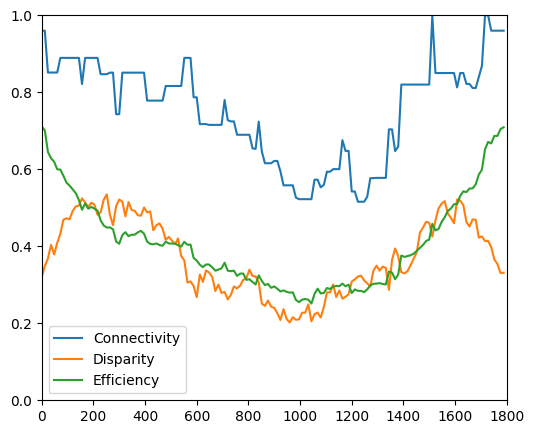

In [20]:
plt.figure(figsize=(6,5))
plt.plot(avg_df['Connectivity'], label='Connectivity')
plt.plot(avg_df['Disparity_avg'], label='Disparity')
plt.plot(avg_df['Efficiency'], label='Efficiency')
plt.xlim(0,1800)
plt.ylim(0,1)
plt.legend()

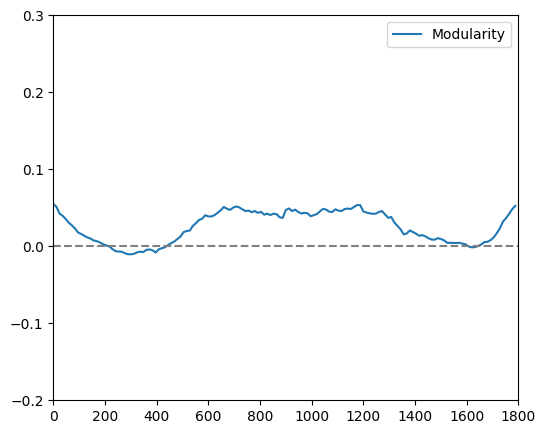

In [41]:
plt.figure(figsize=(6,5))
plt.plot(avg_df['Modularity'], label='Modularity')
plt.hlines(0,0,1800, ls='--', color='gray')
plt.xlim(0,1800)
plt.ylim(-0.2,0.3)
plt.legend()

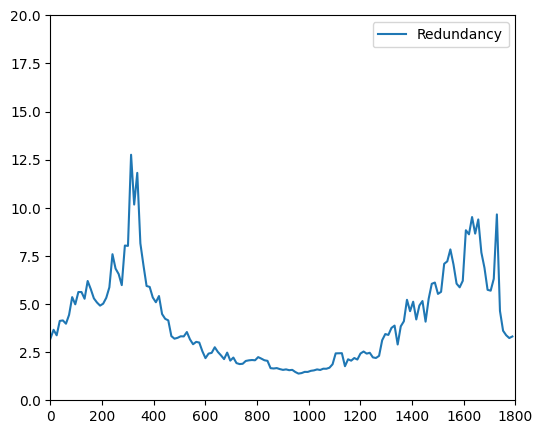

In [22]:
plt.figure(figsize=(6,5))
plt.plot(avg_df['Redundancy_avg'], label='Redundancy')
plt.xlim(0,1800)
plt.ylim(0,20)
plt.legend()

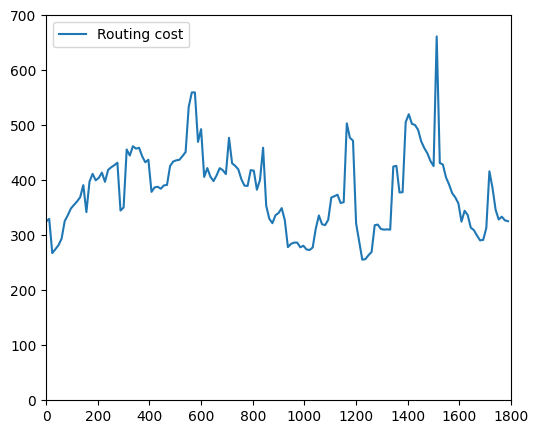

In [23]:
plt.figure(figsize=(6,5))
plt.plot(avg_df['RCost'], label='Routing cost')
plt.xlim(0,1800)
plt.ylim(0,700)
plt.legend()

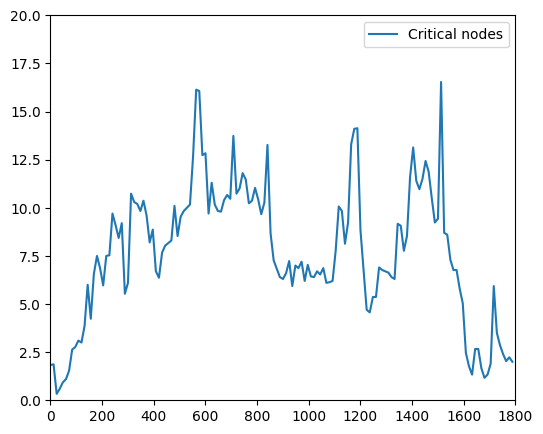

In [25]:
plt.figure(figsize=(6,5))
plt.plot(avg_df['Criticity'], label='Critical nodes')
plt.xlim(0,1800)
plt.ylim(0,20)
plt.legend()

In [26]:
variables = ['Redundancy_avg', 'Connectivity', 'Disparity_avg', 'Modularity', 'Criticity', 'RCost', 'Efficiency']

In [37]:
# Correlated variables:
# Redundancy: [Disparity, Modularity]
# Connectivity: [RCost, Efficiency]
# Disparity: [Redundancy, Modularity, RCost]
# Modularity: [Disparity, Redundancy]
# Criticity: [RCost]
# RCost: [Connectivity, Disparity, Criticity]
# Efficiency: [Connectivity]

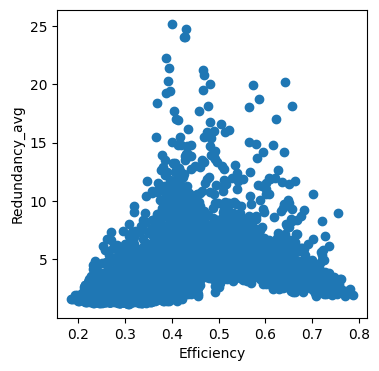

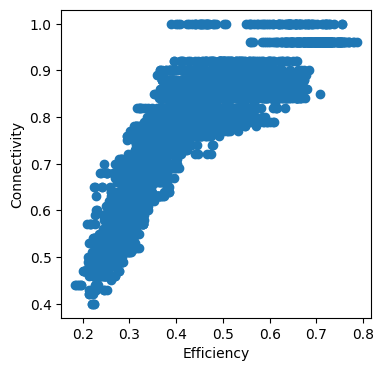

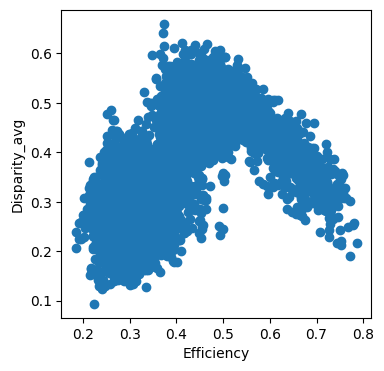

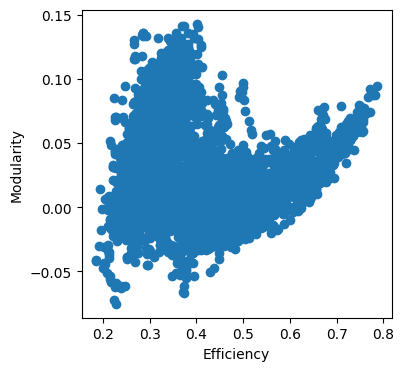

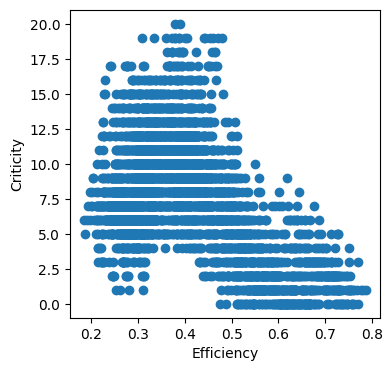

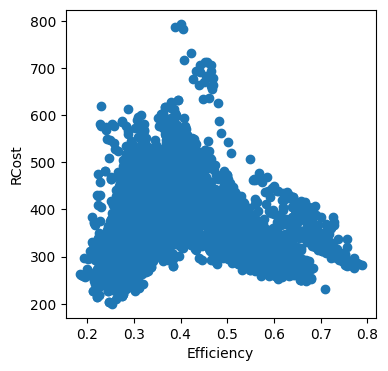

In [36]:
metric = 'Efficiency'
for var in variables:
    if var != metric:
        plt.figure(figsize=(4,4))
        plt.scatter(df[metric], df[var])
        plt.xlabel(metric)
        plt.ylabel(var)